# [ML Dimension Reduction] Iris Classification

#### 1. Principal Component Analysis (PCA)
#### 2. Linear Discriminant Analysis (LDA)
#### 3. Truncated Singular Value Decomposition (Truncated SVD)
#### 4. Non-Negative Matrix Factorization (NMF)
#### 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.decomposition import NMF
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()

In [3]:
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


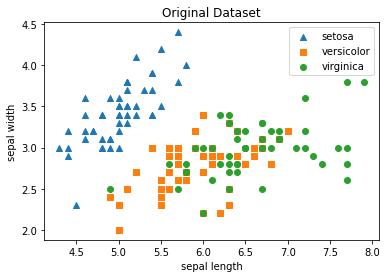

In [4]:
markers=['^', 's', 'o']  # setosa=0, versicolor=1, virginica=2

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.title('Original Dataset')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [5]:
rfc = RandomForestClassifier(random_state=156)
scores = cross_val_score(rfc, iris.data, iris.target,scoring='accuracy',cv=3)
print('Cross-Validation Accuracy:', scores)  
print('Average Accuracy:', np.mean(scores))   

Cross-Validation Accuracy: [0.98 0.94 0.96]
Average Accuracy: 0.96


## 1. PCA

In [6]:
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [7]:
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [8]:
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


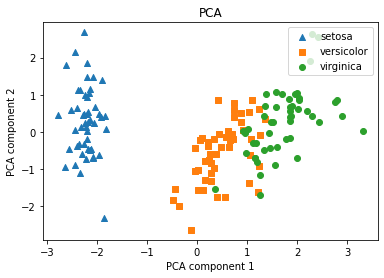

In [9]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.title('PCA')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.show()

In [10]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [11]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rfc, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA Cross-Validation Accuracy:', scores_pca)
print('PCA Average Accuracy:', np.mean(scores_pca))

PCA Cross-Validation Accuracy: [0.88 0.88 0.88]
PCA Average Accuracy: 0.88


## 2. LDA

In [12]:
iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [13]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


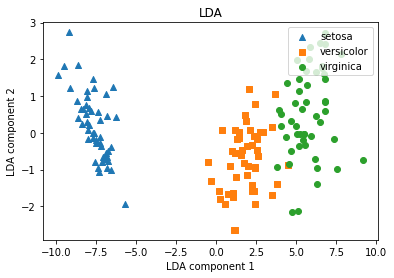

In [14]:
lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']*(-1)
    # multiply (-1) because sklearn version 1.0.2 shows mirror image of LDA
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.title('LDA')
plt.xlabel('LDA component 1')
plt.ylabel('LDA component 2')
plt.show()

In [15]:
print(lda.explained_variance_ratio_)

[0.9912126 0.0087874]


In [16]:
lda_X = irisDF_lda[['lda_component_1', 'lda_component_2']]
scores_lda = cross_val_score(rfc, lda_X, iris.target, scoring='accuracy', cv=3 )
print('LDA Cross-Validation Accuracy:',scores_lda)
print('LDA Average Accuracy:', np.mean(scores_lda))

LDA Cross-Validation Accuracy: [1.   0.9  0.96]
LDA Average Accuracy: 0.9533333333333333


## 3. Truncated SVD

In [17]:
iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [18]:
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)
print(iris_tsvd.shape)

(150, 2)


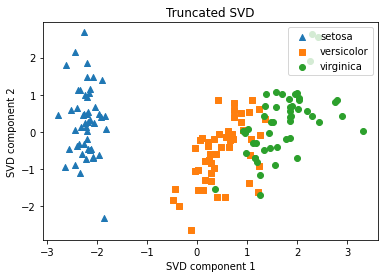

In [19]:
tsvd_columns=['tsvd_component_1','tsvd_component_2']
irisDF_tsvd = pd.DataFrame(iris_tsvd,columns=tsvd_columns)
irisDF_tsvd['target']=iris.target

markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_tsvd[irisDF_tsvd['target']==i]['tsvd_component_1']
    y_axis_data = irisDF_tsvd[irisDF_tsvd['target']==i]['tsvd_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.title('Truncated SVD')
plt.xlabel('SVD component 1')
plt.ylabel('SVD component 2')
plt.show()

In [20]:
print(tsvd.explained_variance_ratio_)

[0.72962445 0.22850762]


In [21]:
tsvd_X = irisDF_tsvd[['tsvd_component_1', 'tsvd_component_2']]
scores_tsvd = cross_val_score(rfc, tsvd_X, iris.target, scoring='accuracy', cv=3 )
print('TSVD Cross-Validation Accuracy:', scores_tsvd)
print('TSVD Average Accuracy:', np.mean(scores_tsvd))

TSVD Cross-Validation Accuracy: [0.88 0.88 0.88]
TSVD Average Accuracy: 0.88


## 4. NMF

In [22]:
iris = load_iris()
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)

In [23]:
nmf = NMF(n_components=2)
nmf.fit(irisDF)
iris_nmf = nmf.transform(irisDF)
print(iris_nmf.shape)

(150, 2)


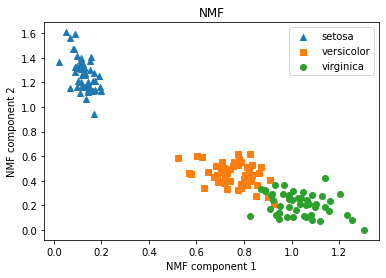

In [24]:
columns = ['nmf_component_1','nmf_component_2']
irisDF_nmf = pd.DataFrame(iris_nmf, columns=columns)
irisDF_nmf['target']=iris.target

markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_nmf[irisDF_nmf['target']==i]['nmf_component_1']
    y_axis_data = irisDF_nmf[irisDF_nmf['target']==i]['nmf_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.title('NMF')
plt.xlabel('NMF component 1')
plt.ylabel('NMF component 2')
plt.show()

In [25]:
#print(nmf.explained_variance_ratio_)
#'NMF' object has no attribute 'explained_variance_ratio_'

In [26]:
nmf_X = irisDF_nmf[['nmf_component_1', 'nmf_component_2']]
scores_nmf = cross_val_score(rfc, nmf_X, iris.target, scoring='accuracy', cv=3 )
print('NMF Cross-Validation Accuracy:', scores_nmf)
print('NMF Average Accuracy:', np.mean(scores_nmf))

NMF Cross-Validation Accuracy: [0.98 0.92 0.96]
NMF Average Accuracy: 0.9533333333333333
